Andrés Daniel Martínez Bermúdez, A00227463

# Visualizing Data in Python

When working with a new dataset, one of the most useful things to do is to begin to visualize the data. By using **tables**, **histograms**, **boxplots**, **scatter plots** and other visual tools, we can get a better idea of what the data may be trying to tell us, and we can gain insights into the data that we may have not discovered otherwise.

In this notebook will use the [Seaborn](https://seaborn.pydata.org/) data processing library, which is a higher-level interface to **Matplotlib** that can be used to simplify many visualization tasks

The **Seaborn** provides visualisations tools that will allow to explore data from a graphical perspective.


## Acknowledgments

- Data from https://www.coursera.org/ from the course "Understanding and Visualizing Data with Python" by University of Michigan

# Importing libraries

In [2]:
%pip install pandas
%pip install seaborn
%pip install scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import the packages that we will be using
import pandas as pd 
import seaborn as sns
from sklearn.datasets import load_iris


# Importing data

In [4]:
# load iris into dataframe 
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# Exploring the content of the data set

Get a general 'feel' of the data


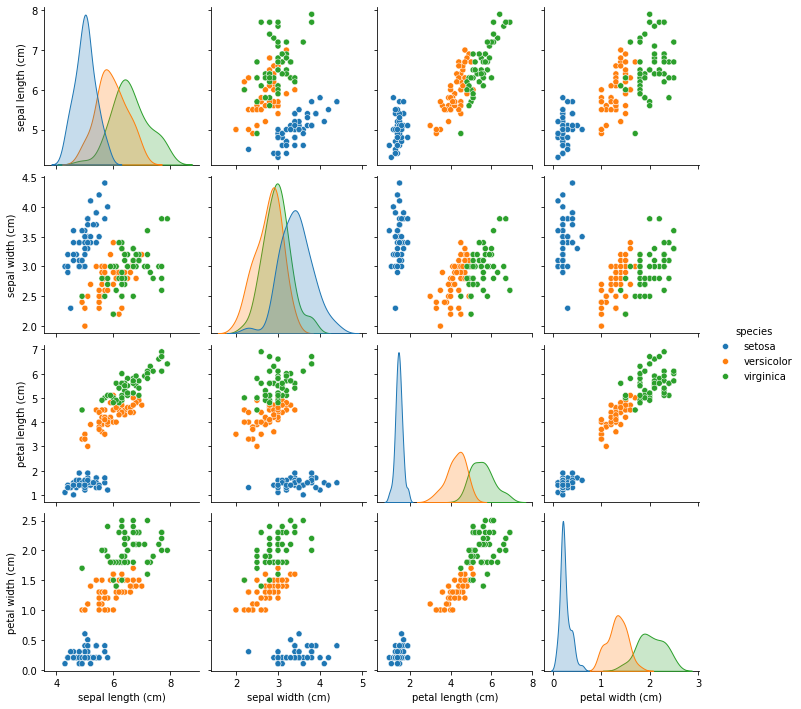

In [5]:
# Plot the data
sns.pairplot(df, hue='species')

# Frequency tables

The `value_counts()` method can be used to determine the number of times that each distinct value of a variable occurs in a data set.  In statistical terms, this is the "frequency distribution" of the variable. The `value_counts()` method produces a table with two columns.  The first column contains all distinct observed values for the variable.  The second column contains the number of times each of these values occurs.  Note that the table returned by `value_counts()` is actually a **Pandas** data frame, so can be further processed using any Pandas methods for working with data frames.


In [6]:
# Number of times that each distinct value of a variable occurs in a data set
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [7]:
# Proportion of each distinct value of a variable occurs in a data set
df['species'].value_counts(normalize=True)

species
setosa        0.333333
versicolor    0.333333
virginica     0.333333
Name: proportion, dtype: float64

Note that the `value_counts()` method excludes missing values. We confirm this below by adding up observations to your data frame with some missing values and then computing `value_counts()` and comparing this to the total number of rows in the data set, which is 28. This tells us that there are 28 - (21+6) = 1 missing values for this variable (other variables may have different numbers of missing values).

In [8]:
# Total number of observations
print(df['species'].count())

# Total number of null observations
print(df['species'].isnull().sum())

# Total number of counts (excluding missing values)
print(df['species'].value_counts().sum())


150
0
150


# Histogram

It is often good to get a feel for the shape of the distribution of the data.

Text(0.5, 1.0, 'Histogram of Sepal Length')

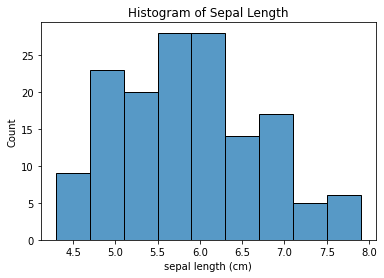

In [9]:
# Plot histogram of the total bill only
sns.histplot(df['sepal length (cm)'], kde = False).set_title('Histogram of Sepal Length')

Text(0.5, 1.0, 'Distribution of Sepal Length')

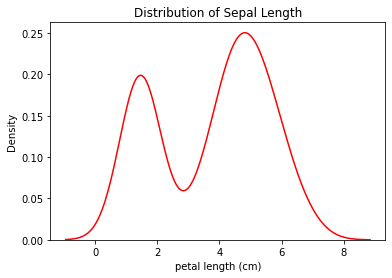

In [10]:
# Plot distribution of the tips only
sns.kdeplot(df['petal length (cm)'], color = 'red').set_title('Distribution of Sepal Length')

Text(0.5, 1.0, 'Histogram of Petal and Sepal Length')

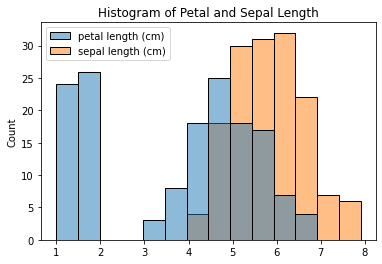

In [11]:
# Plot histogram of both the Age and the Wingspan
# plot both petal and sepal length
sns.histplot(df[['petal length (cm)', 'sepal length (cm)']], kde=False).set_title('Histogram of Petal and Sepal Length')


# Histograms plotted by groups

While looking at a single variable is interesting, it is often useful to see how a variable changes in response to another. Thus, we can create a histograms of one quantitative variable grouped by another categorical variables.

Text(0.5, 1.0, 'Histogram of Petal Length by Species')

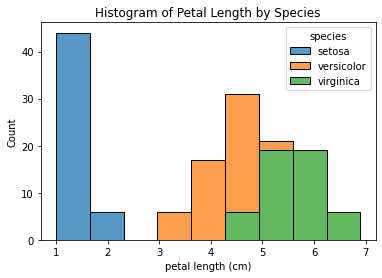

In [12]:
# Create histograms of the "Wingspan" grouped by "Gender"
# Histogram of the petal length grouped by species
sns.histplot(data=df, x='petal length (cm)', hue='species', multiple='stack').set_title('Histogram of Petal Length by Species')

# Boxplots

Boxplots do not show the shape of the distribution, but they can give us a better idea about the center and spread of the distribution as well as any potential outliers that may exist. Boxplots and Histograms often complement each other and help an analyst get more information about the data

Text(0.5, 1.0, 'Boxplot of Sepal Length')

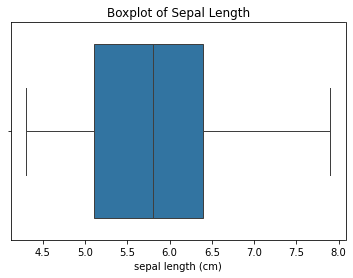

In [13]:
# Create the boxplot of the "total bill" amounts
sns.boxplot(x=df['sepal length (cm)']).set_title('Boxplot of Sepal Length')

Text(0.5, 1.0, 'Boxplot of Petal Length')

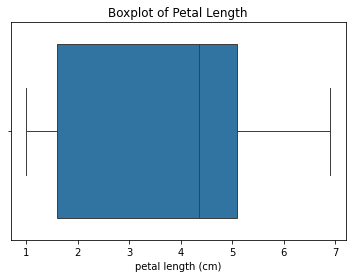

In [14]:
# Create the boxplot of the "tips" amounts
sns.boxplot(x=df['petal length (cm)']).set_title('Boxplot of Petal Length')

Text(0.5, 1.0, 'Boxplot of Sepal and Petal Length')

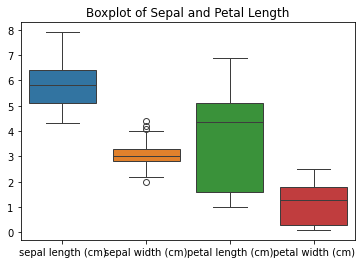

In [15]:
# Create the boxplots of the "Wingspan" and of the "Height" amounts
sns.boxplot(data=df, orient='v').set_title('Boxplot of Sepal and Petal Length')

# Boxplots plotted by groups

While looking at a single variable is interesting, it is often useful to see how a variable changes in response to another. Thus, we can create a side-by-side boxplots of one quantitative variable grouped by another categorical variables.

Text(0.5, 1.0, 'Boxplot of Sepal Length by Species')

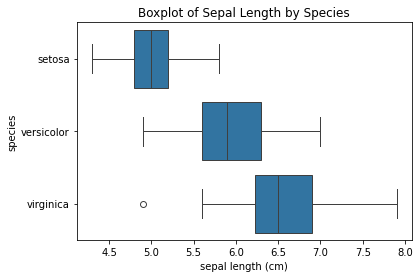

In [16]:
# Create side-by-side boxplots of the "Height" grouped by "Gender"
sns.boxplot(x=df['sepal length (cm)'], y=df['species']).set_title('Boxplot of Sepal Length by Species')

# Histograms and boxplots plotted by groups

We cal also create both boxplots and histograms of one quantitative variable grouped by another categorical variables


Text(0.5, 1.0, 'Boxplot of Petal Length by Species')

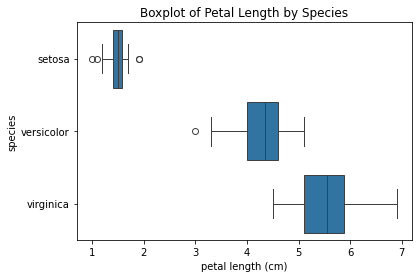

In [17]:
# Create a boxplot and histogram of the "tips" grouped by "Gender"
sns.boxplot(x=df['petal length (cm)'], y=df['species']).set_title('Boxplot of Petal Length by Species')

# Scatter plot

Plot values of one variable versus another variable to see how they are correlated

Text(0.5, 1.0, 'Scatterplot of Sepal Length and Petal Length')

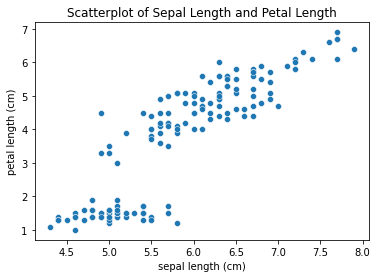

In [18]:
# scatter plot between two variables
sns.scatterplot(x='sepal length (cm)', y='petal length (cm)', data=df).set_title('Scatterplot of Sepal Length and Petal Length')

Text(0.5, 1.0, 'Scatterplot of Sepal Length and Petal Length by Species')

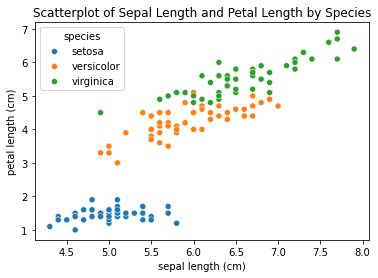

In [19]:
# scatter plot between two variables (one categorical)
sns.scatterplot(x='sepal length (cm)', y='petal length (cm)', hue='species', data=df).set_title('Scatterplot of Sepal Length and Petal Length by Species')

Text(0.5, 1.0, 'Scatterplot of Species and Petal Length')

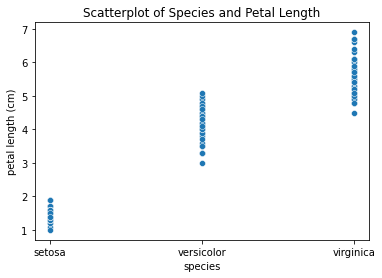

In [20]:
# scatter plot between two variables (one categorical)
# between species and petal length cm
sns.scatterplot(x='species', y='petal length (cm)', data=df).set_title('Scatterplot of Species and Petal Length')

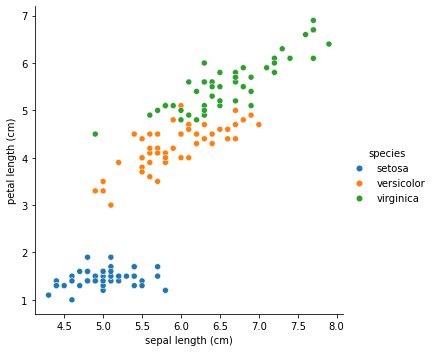

In [21]:
# scatter plot between two variables grouped according to a categorical variable
sns.relplot(x='sepal length (cm)', y='petal length (cm)', hue='species', data=df)

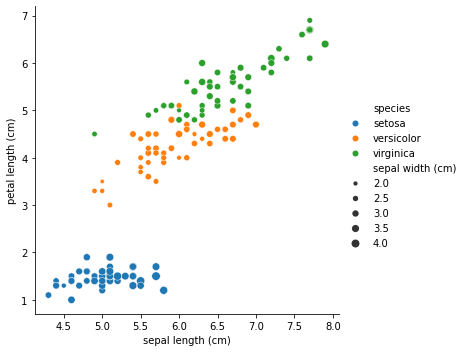

In [22]:
# scatter plot between two variables grouped according to a categorical variable and with size of markers
sns.relplot(x='sepal length (cm)', y='petal length (cm)', hue='species', size='sepal width (cm)', data=df)

# Final remarks


- Visualizing your data using **tables**, **histograms**, **boxplots**, **scatter plots** and other tools is essential to carry put analysis and extract conclusions

- There are several ways to do the same thing

- The **Seaborn** package provides visualisations tools that allow to explore data from a graphical perspective


# Activity: work with the iris dataset

Repeat this tutorial with the iris data set and respond to the following inquiries

1. Plot the histograms for each of the four quantitative variables


2. Plot the histograms for each of the quantitative variables


3. Plot the boxplots for each of the quantitative variables


4. Plot the boxplots of the petal width grouped by type of flower


5. Plot the boxplots of the setal length grouped by type of flower


6. Provide a description (explaination from your observations) of each of the quantitative variables


Text(0.5, 1.0, 'Histogram of Petal Width')

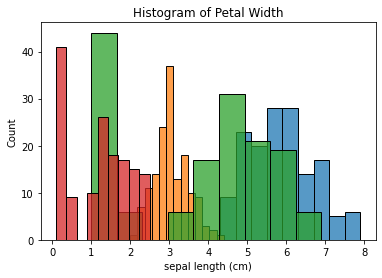

In [23]:
# # Activity: work with the iris dataset
# Repeat this tutorial with the iris data set and respond to the following inquiries

# 1. Plot the histograms for each of the four quantitative variables
sns.histplot(df['sepal length (cm)'], kde=False).set_title('Histogram of Sepal Length')
sns.histplot(df['sepal width (cm)'], kde=False).set_title('Histogram of Sepal Width')
sns.histplot(df['petal length (cm)'], kde=False).set_title('Histogram of Petal Length')
sns.histplot(df['petal width (cm)'], kde=False).set_title('Histogram of Petal Width')

# 2. Plot the histograms for each of the quantitative variables

# It's the same since there's only four quantitative variables

# 3. Plot the boxplots for each of the quantitative variables
# 4. Plot the boxplots of the petal width grouped by type of flower
# 5. Plot the boxplots of the setal length grouped by type of flower
# 6. Provide a description (explaination from your observations) of each of the quantitative variables

Text(0.5, 1.0, 'Histogram of Sepal Width')

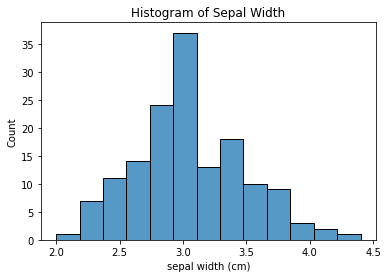

In [24]:
sns.histplot(df['sepal width (cm)'], kde=False).set_title('Histogram of Sepal Width')


Text(0.5, 1.0, 'Histogram of Petal Length')

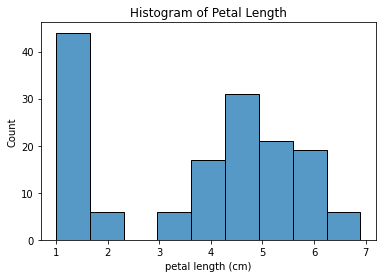

In [25]:
sns.histplot(df['petal length (cm)'], kde=False).set_title('Histogram of Petal Length')


Text(0.5, 1.0, 'Histogram of Petal Width')

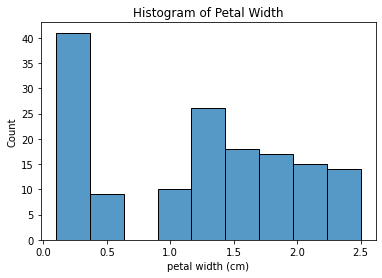

In [26]:
sns.histplot(df['petal width (cm)'], kde=False).set_title('Histogram of Petal Width')

Text(0.5, 1.0, 'Boxplot of Sepal Length')

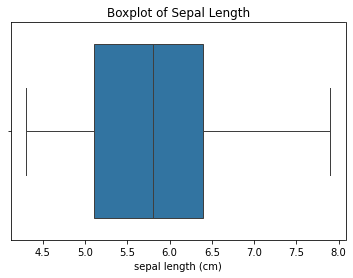

In [27]:
sns.boxplot(x=df['sepal length (cm)']).set_title('Boxplot of Sepal Length')


Text(0.5, 1.0, 'Boxplot of Sepal Width')

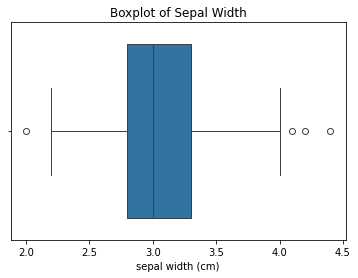

In [28]:
sns.boxplot(x=df['sepal width (cm)']).set_title('Boxplot of Sepal Width')


Text(0.5, 1.0, 'Boxplot of Petal Length')

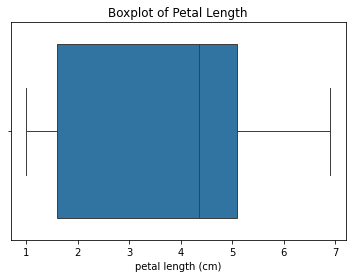

In [29]:
sns.boxplot(x=df['petal length (cm)']).set_title('Boxplot of Petal Length')


Text(0.5, 1.0, 'Boxplot of Petal Width')

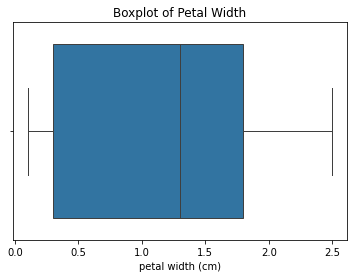

In [30]:
sns.boxplot(x=df['petal width (cm)']).set_title('Boxplot of Petal Width')

Text(0.5, 1.0, 'Boxplot of Petal Width by Species')

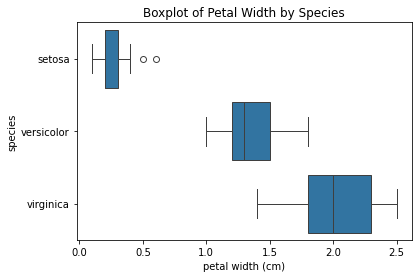

In [31]:

sns.boxplot(x=df['petal width (cm)'], y=df['species']).set_title('Boxplot of Petal Width by Species')

Text(0.5, 1.0, 'Boxplot of Sepal Length by Species')

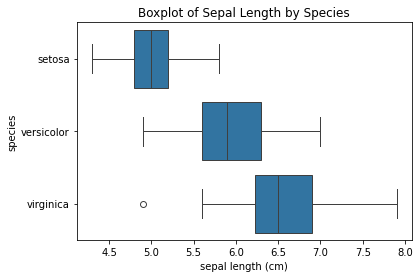

In [32]:
sns.boxplot(x=df['sepal length (cm)'], y=df['species']).set_title('Boxplot of Sepal Length by Species')

In [33]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [34]:
# 6. Provide a description (explaination from your observations) of each of the quantitative variables

# In terms of Sepal Length, we can see that Setosa is much shorter than Versicolor and Virginica, which is almost a centimeter and a half longer than Setosa. In terms of sepal width, we can see that it usually goes towards 3cm, which is the average for all the species. In all of the species, the petal length tends to be either 1 or 4.5cm, which means there's a lot of differences between the different species. And, finally, we can see the petal width does not vary at all with Setosa but does a little bit more with Virginica.